In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DataSet/UNSW_NB15_training-set.csv")
df.shape

(175341, 45)

In [4]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
normal = df[df['label']==0].sample(2000,random_state=42)
attack = df[df['label']==1].sample(500,random_state=42)

df_sample = pd.concat([normal, attack])
df_sample.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
95744,95745,0.661656,tcp,http,FIN,10,10,804,1330,28.715827,...,1,5,0,0,1,2,5,0,Normal,0
44163,44164,1.501572,tcp,http,FIN,60,16,68195,698,49.947654,...,1,2,0,0,0,1,2,0,Normal,0
35746,35747,0.022939,tcp,-,FIN,40,42,2542,23508,3531.104190,...,1,1,0,0,0,6,6,0,Normal,0
13713,13714,0.333839,tcp,ssh,FIN,32,24,3728,5474,164.750074,...,1,5,0,0,0,3,1,0,Normal,0
32127,32128,0.023857,tcp,-,FIN,50,48,3062,32538,4065.892720,...,1,6,0,0,0,4,8,0,Normal,0


In [10]:
df_sayisal = df_sample.select_dtypes(['int64','float64'])
df_sayisal = df_sayisal.drop(columns=['id'])

In [25]:
df_sayisal.isnull().sum()

,0
dur,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0
sttl,0
dttl,0
sload,0
dload,0


In [44]:
X = df_sayisal.drop(['label'], axis=1)
y= df_sayisal['label']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

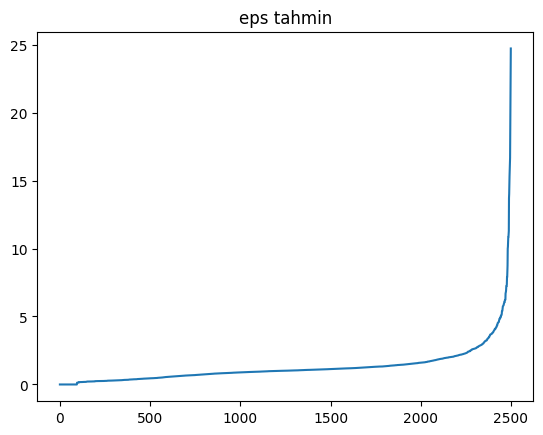

In [16]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("eps tahmin")
plt.show()

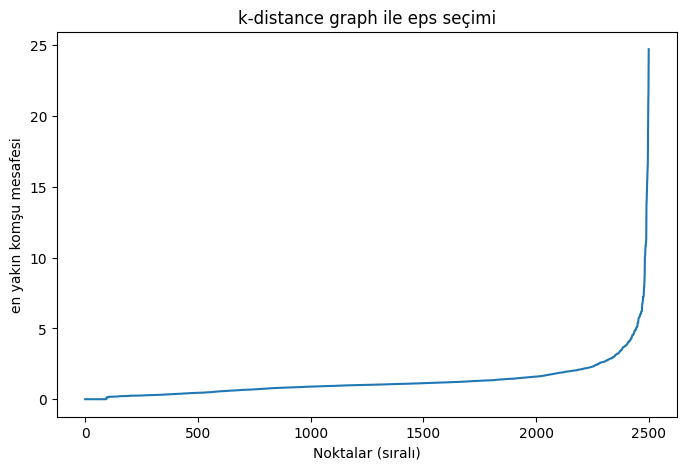

In [20]:
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Noktalar (sıralı)")
plt.ylabel("en yakın komşu mesafesi")
plt.title("k-distance graph ile eps seçimi")
plt.show()

In [24]:
X_values = X_scaled
eps_values = np.arange(1.8, 2.21, 0.05)
min_samples = 5

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_values)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = list(labels).count(-1) / len(labels)

    print(f"eps={eps:.2f} → Küme sayısı: {n_clusters}, Gürültü oranı: {noise_ratio:.2%}")

eps=1.80 → Küme sayısı: 26, Gürültü oranı: 12.44%
eps=1.85 → Küme sayısı: 25, Gürültü oranı: 11.84%
eps=1.90 → Küme sayısı: 23, Gürültü oranı: 11.16%
eps=1.95 → Küme sayısı: 22, Gürültü oranı: 10.64%
eps=2.00 → Küme sayısı: 20, Gürültü oranı: 10.00%
eps=2.05 → Küme sayısı: 20, Gürültü oranı: 9.16%
eps=2.10 → Küme sayısı: 20, Gürültü oranı: 8.80%
eps=2.15 → Küme sayısı: 20, Gürültü oranı: 8.72%
eps=2.20 → Küme sayısı: 19, Gürültü oranı: 8.44%


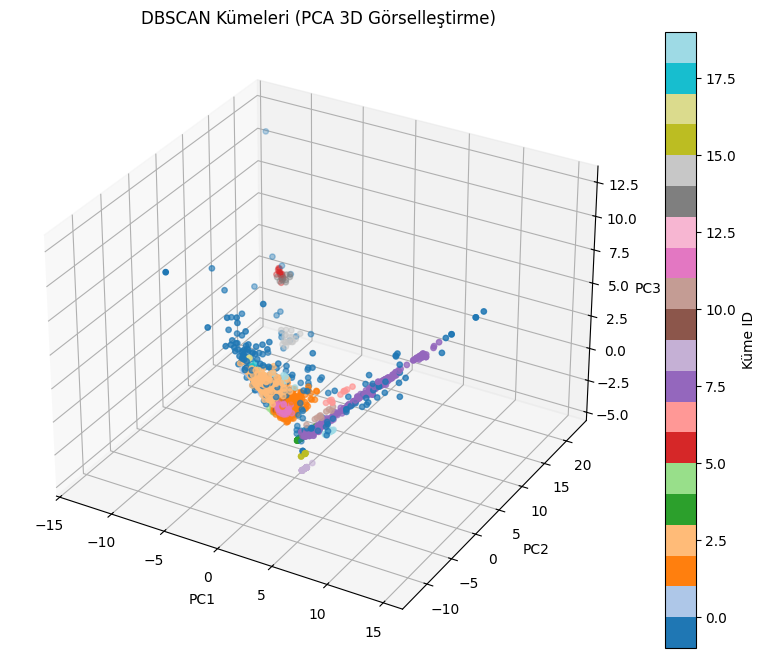

In [26]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels, cmap='tab20', s=15
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("DBSCAN Kümeleri (PCA 3D Görselleştirme)")
plt.colorbar(scatter, ax=ax, label="Küme ID")
plt.show()


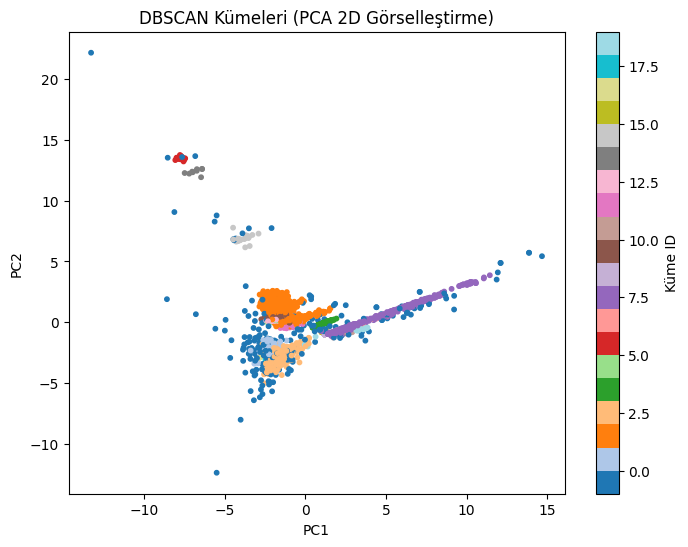

In [27]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=labels, cmap='tab20', s=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Kümeleri (PCA 2D Görselleştirme)")
plt.colorbar(scatter, label="Küme ID")
plt.show()

In [29]:
X_values = X_scaled
eps_values = np.arange(1.6, 2.21, 0.05)
min_samples = 6

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_values)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = list(labels).count(-1) / len(labels)

    print(f"eps={eps:.2f} → Küme sayısı: {n_clusters}, Gürültü oranı: {noise_ratio:.2%}")

eps=1.60 → Küme sayısı: 22, Gürültü oranı: 16.48%
eps=1.65 → Küme sayısı: 25, Gürültü oranı: 15.36%
eps=1.70 → Küme sayısı: 26, Gürültü oranı: 14.44%
eps=1.75 → Küme sayısı: 27, Gürültü oranı: 13.72%
eps=1.80 → Küme sayısı: 26, Gürültü oranı: 13.12%
eps=1.85 → Küme sayısı: 28, Gürültü oranı: 12.36%
eps=1.90 → Küme sayısı: 24, Gürültü oranı: 11.64%
eps=1.95 → Küme sayısı: 22, Gürültü oranı: 11.28%
eps=2.00 → Küme sayısı: 21, Gürültü oranı: 10.68%
eps=2.05 → Küme sayısı: 20, Gürültü oranı: 9.80%
eps=2.10 → Küme sayısı: 18, Gürültü oranı: 9.44%
eps=2.15 → Küme sayısı: 18, Gürültü oranı: 9.28%
eps=2.20 → Küme sayısı: 17, Gürültü oranı: 9.16%


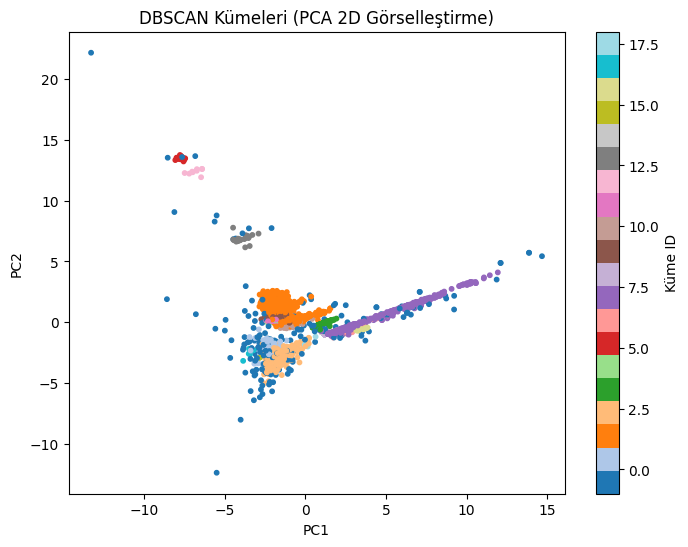

In [36]:
dbscan = DBSCAN(eps=2.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=labels, cmap='tab20', s=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Kümeleri (PCA 2D Görselleştirme)")
plt.colorbar(scatter, label="Küme ID")
plt.show()

In [43]:
unique_labels, counts = np.unique(labels, return_counts=True)

cluster_counts = pd.DataFrame({
    "Küme ID": unique_labels,
    "Sample Sayısı": counts
}).sort_values(by="Sample Sayısı", ascending=False)


noise_ratio = counts[unique_labels == -1].sum() / len(labels) * 100 if -1 in unique_labels else 0

print(cluster_counts.to_string(index=False))
print(f"\nToplam Küme Sayısı (gürültü hariç): {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Gürültü Oranı: %{noise_ratio:.2f}")

 Küme ID  Sample Sayısı
       1            701
       3            396
       7            375
       2            323
      -1            211
       9            112
       8             92
       0             54
      11             53
      10             45
       4             34
       6             21
      13             19
       5             16
      16             12
      14             10
      12              9
      18              7
      15              5
      17              5

Toplam Küme Sayısı (gürültü hariç): 19
Gürültü Oranı: %8.44


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_clusters = labels
mask = y_pred_clusters != -1
y_true_masked = y[mask]
y_pred_clusters_masked = y_pred_clusters[mask]

In [46]:
mapping = {}
for cluster in np.unique(y_pred_clusters_masked):
    indices = y_pred_clusters_masked == cluster
    most_common_class = np.bincount(y_true_masked[indices]).argmax()
    mapping[cluster] = most_common_class

In [48]:
y_pred_mapped = np.array([mapping.get(c, -1) for c in y_pred_clusters_masked])
cm = confusion_matrix(y_true_masked, y_pred_mapped)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nPrecision / Recall / F1:")
print(classification_report(y_true_masked, y_pred_mapped))

Confusion Matrix:
 [[1780   89]
 [ 122  298]]

Precision / Recall / F1:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1869
           1       0.77      0.71      0.74       420

    accuracy                           0.91      2289
   macro avg       0.85      0.83      0.84      2289
weighted avg       0.91      0.91      0.91      2289



İyileştirme Fikirleri

eps ve min_samples’ı biraz daha oynamak → Belki recall’ı artırabilir.

Özellik ölçekleme / seçme → PCA öncesinde belirli özellikleri seçmek sınıf 1’in ayrımını netleştirebilir.

Gürültü (-1) verilerini özel olarak işlemek → Bazılarını sınıflara atanabilir hale getirmek.

In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
iso = IsolationForest(contamination= y.mean(),random_state=42)

In [51]:
y_pred_iso = iso.fit_predict(X_scaled)
y_pred_iso_mapped = np.where(y_pred_iso == 1, 0, 1)  #1 = normal, -1 = anomali
cm_iso = confusion_matrix(y, y_pred_iso_mapped)
print("Confusion Matrix (Isolation Forest):\n", cm_iso)

# Precision / Recall / F1
print("\nPrecision / Recall / F1 (Isolation Forest):")
print(classification_report(y, y_pred_iso_mapped))

Confusion Matrix (Isolation Forest):
 [[1652  348]
 [ 348  152]]

Precision / Recall / F1 (Isolation Forest):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2000
           1       0.30      0.30      0.30       500

    accuracy                           0.72      2500
   macro avg       0.56      0.56      0.56      2500
weighted avg       0.72      0.72      0.72      2500



In [52]:
iso = IsolationForest(contamination= 0.05,random_state=42)

y_pred_iso = iso.fit_predict(X_scaled)
y_pred_iso_mapped = np.where(y_pred_iso == 1, 0, 1)  #1 = normal, -1 = anomali
cm_iso = confusion_matrix(y, y_pred_iso_mapped)
print("Confusion Matrix (Isolation Forest):\n", cm_iso)

# Precision / Recall / F1
print("\nPrecision / Recall / F1 (Isolation Forest):")
print(classification_report(y, y_pred_iso_mapped))

Confusion Matrix (Isolation Forest):
 [[1912   88]
 [ 463   37]]

Precision / Recall / F1 (Isolation Forest):
              precision    recall  f1-score   support

           0       0.81      0.96      0.87      2000
           1       0.30      0.07      0.12       500

    accuracy                           0.78      2500
   macro avg       0.55      0.52      0.50      2500
weighted avg       0.70      0.78      0.72      2500



In [53]:
for c in [0.05, 0.10, 0.15, 0.20, 0.25]:
    iso = IsolationForest(contamination=c, random_state=42)
    y_pred_iso = iso.fit_predict(X_scaled)
    y_pred_iso_mapped = np.where(y_pred_iso == 1, 0, 1)
    print(f"c={c}", classification_report(y, y_pred_iso_mapped, digits=3))


c=0.05               precision    recall  f1-score   support

           0      0.805     0.956     0.874      2000
           1      0.296     0.074     0.118       500

    accuracy                          0.780      2500
   macro avg      0.551     0.515     0.496      2500
weighted avg      0.703     0.780     0.723      2500

c=0.1               precision    recall  f1-score   support

           0      0.812     0.913     0.859      2000
           1      0.304     0.152     0.203       500

    accuracy                          0.761      2500
   macro avg      0.558     0.532     0.531      2500
weighted avg      0.710     0.761     0.728      2500

c=0.15               precision    recall  f1-score   support

           0      0.822     0.874     0.847      2000
           1      0.325     0.244     0.279       500

    accuracy                          0.748      2500
   macro avg      0.574     0.559     0.563      2500
weighted avg      0.723     0.748     0.733      2500


DBSCAN ile karşılaştırırsak hâlâ her contamination değerine göre daha dengeli görünüyor

DBSCAN bu veri setinde hem normal hem saldırı sınıfında çok daha dengeli sonuç verdi.

Isolation Forest contamination ayarlasam bile saldırı yakalama konusunda DBSCAN kadar güçlü değil.

Eğer amaç saldırı tespitinde yüksek başarı ise DBSCAN, yanlış pozitifleri düşük tutmak istiyorsak ve saldırıların az sayıda olduğu bir ortam için ise Isolation Forest düşünülebilir.